<a href="https://colab.research.google.com/github/Shoreef/Monitoring-Physical-Acitvity-for-social-prescribing-/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.preprocessing import KBinsDiscretizer
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Import the Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/physical_activity/data.csv')
print(df.head(11))

         0_X       0_Y       1_X       1_Y       2_X       2_Y       3_X  \
0   0.455679 -0.026609 -0.598702 -0.492266  0.468983 -0.043240 -0.598702   
1   0.556456 -0.041475 -0.549543 -0.770743  0.559912 -0.048387 -0.549543   
2   0.218392  0.171594  0.322388  0.077997  0.114396  0.067597  0.478382   
3   0.094077 -0.001710  0.131708 -0.032499  0.059867 -0.035920  0.186444   
4   0.036758  0.008752  0.078767 -0.022755  0.001750 -0.029757  0.145282   
5   0.075000 -0.025000  0.225000 -0.125000 -0.050000 -0.175000  0.450000   
6   0.070857 -0.100381  0.212571 -0.206666 -0.035428 -0.253904  0.425141   
7  -0.017301  0.276810  0.121104  0.184540 -0.121104  0.138405  0.294111   
8   0.063104  0.705616  0.177838  0.625302 -0.051630  0.602355  0.349940   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.070084  0.276998  0.063409  0.263648  0.060072  0.270323 -0.453876   

         3_Y       4_X       4_Y       5_X       5_Y       6_X       6_Y  \
0  -0.49226

**Eleminating rows that conatain higher null values**

In [ ]:
def count_zeros(row):
    return (row == 0).sum()

df_filtered = df[df.apply(count_zeros, axis=1) <= 20]

# Display the first few rows of the filtered DataFrame
print(df_filtered.head(11))

# Optionally, save the filtered DataFrame to a new CSV file
df_filtered.to_csv('filtered_file.csv', index=False)

         0_X       0_Y       1_X       1_Y       2_X       2_Y       3_X  \
0   0.455679 -0.026609 -0.598702 -0.492266  0.468983 -0.043240 -0.598702   
1   0.556456 -0.041475 -0.549543 -0.770743  0.559912 -0.048387 -0.549543   
2   0.218392  0.171594  0.322388  0.077997  0.114396  0.067597  0.478382   
3   0.094077 -0.001710  0.131708 -0.032499  0.059867 -0.035920  0.186444   
4   0.036758  0.008752  0.078767 -0.022755  0.001750 -0.029757  0.145282   
5   0.075000 -0.025000  0.225000 -0.125000 -0.050000 -0.175000  0.450000   
6   0.070857 -0.100381  0.212571 -0.206666 -0.035428 -0.253904  0.425141   
7  -0.017301  0.276810  0.121104  0.184540 -0.121104  0.138405  0.294111   
8   0.063104  0.705616  0.177838  0.625302 -0.051630  0.602355  0.349940   
10  0.070084  0.276998  0.063409  0.263648  0.060072  0.270323 -0.453876   
12  0.560483 -0.010379 -0.726552 -0.687111  0.568787 -0.018683 -0.726552   

         3_Y       4_X       4_Y       5_X       5_Y       6_X       6_Y  \
0  -0.49226

In [ ]:
main_dataset=df_filtered

In [ ]:
main_dataset.head()

,0_X,0_Y,1_X,1_Y,2_X,2_Y,3_X,3_Y,4_X,4_Y,5_X,5_Y,6_X,6_Y,7_X,7_Y,8_X,8_Y,9_X,9_Y,10_X,10_Y,11_X,11_Y,12_X,12_Y,13_X,13_Y,14_X,14_Y,15_X,15_Y,16_X,16_Y,Pose_Class
0,0.455679,-0.026609,-0.598702,-0.492266,0.468983,-0.043240,-0.598702,-0.492266,-0.598702,-0.492266,0.395809,-0.039913,0.399135,-0.049892,0.339265,0.036587,0.329286,0.056544,-0.598702,-0.492266,0.329286,0.086479,0.000000,0.019957,0.000000,-0.019957,-0.266090,0.053218,-0.266090,0.033261,-0.485614,0.000000,-0.478962,0.000000,pushup_down
1,0.556456,-0.041475,-0.549543,-0.770743,0.559912,-0.048387,-0.549543,-0.770743,0.514981,-0.065669,0.355994,-0.141706,0.425118,-0.031106,0.273044,-0.238481,0.314519,0.079494,0.273044,-0.238481,0.362906,0.162444,-0.017281,-0.006912,0.017281,0.006912,-0.217744,0.034562,-0.172812,0.086406,-0.445856,-0.006912,-0.466593,0.038019,pushup_down
2,0.218392,0.171594,0.322388,0.077997,0.114396,0.067597,0.478382,-0.077997,-0.072797,-0.088397,0.613577,-0.119596,-0.322388,-0.140395,0.790371,0.171594,-0.686374,0.150794,0.644776,0.764372,-0.530380,0.712374,0.291189,0.005200,-0.291189,-0.005200,0.353587,0.202792,-0.447183,0.171594,0.197593,0.556379,-0.426384,0.514781,pushup_down
3,0.094077,-0.001710,0.131708,-0.032499,0.059867,-0.035920,0.186444,-0.087235,0.005131,-0.094077,0.237759,-0.097498,-0.094077,-0.100919,0.295916,-0.008552,-0.189865,-0.001710,0.251443,0.172760,-0.145392,0.155655,0.100919,0.001710,-0.100919,-0.001710,0.148813,0.073551,-0.111182,0.046183,-0.675647,-0.737225,-0.675647,-0.737225,pushup_down
4,0.036758,0.008752,0.078767,-0.022755,0.001750,-0.029757,0.145282,-0.075267,-0.047260,-0.096271,0.218798,-0.078767,-0.131279,-0.113775,0.292315,0.026256,-0.218798,-0.029757,0.222299,0.211797,-0.187291,0.159285,0.106774,0.012253,-0.106774,-0.012253,0.148783,0.047260,-0.152284,-0.005251,-0.656395,-0.754417,-0.113775,0.082268,pushup_down


#Data Analysis

In [ ]:
main_dataset.nunique().sort_values(ascending=True)

,0
Pose_Class,5
12_Y,5520
11_Y,5520
12_X,6159
11_X,6159
14_X,6195
15_X,6202
16_X,6205
13_X,6208
14_Y,6212


<Axes: >

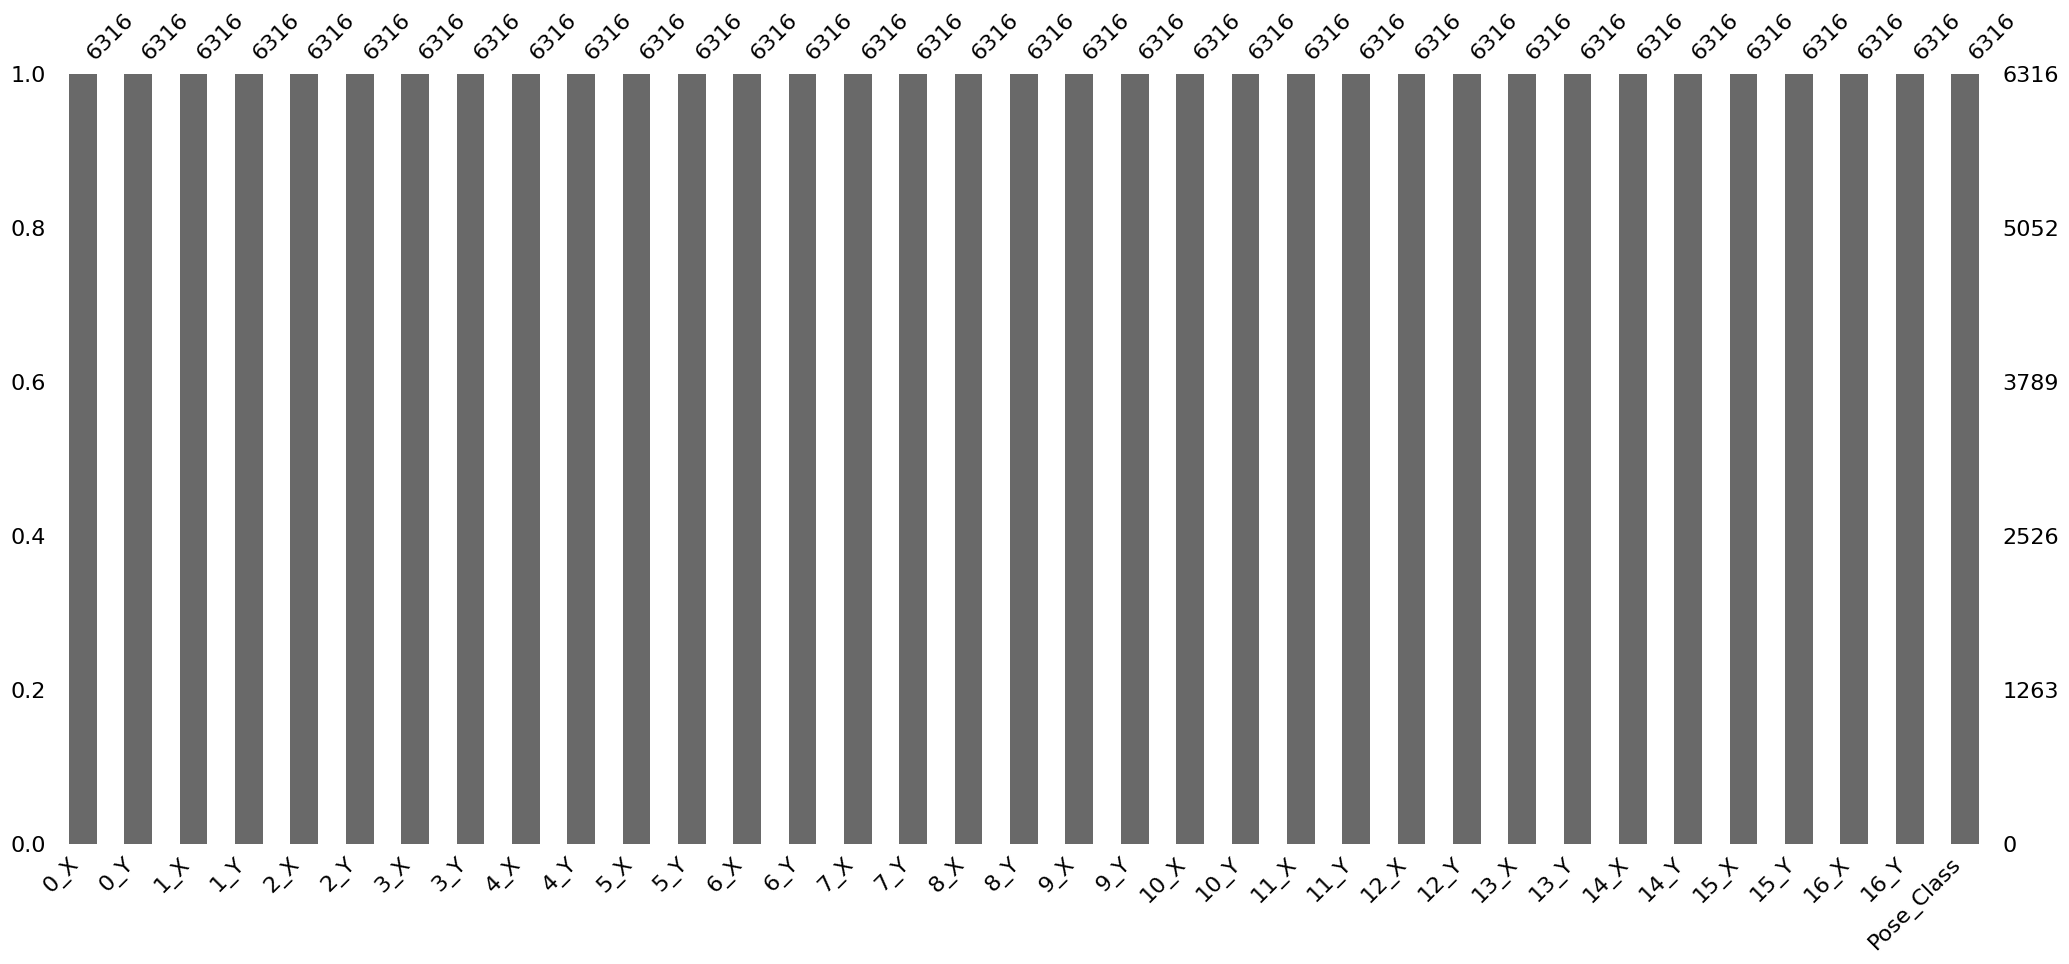

In [ ]:
import missingno as msno
msno.bar(main_dataset)

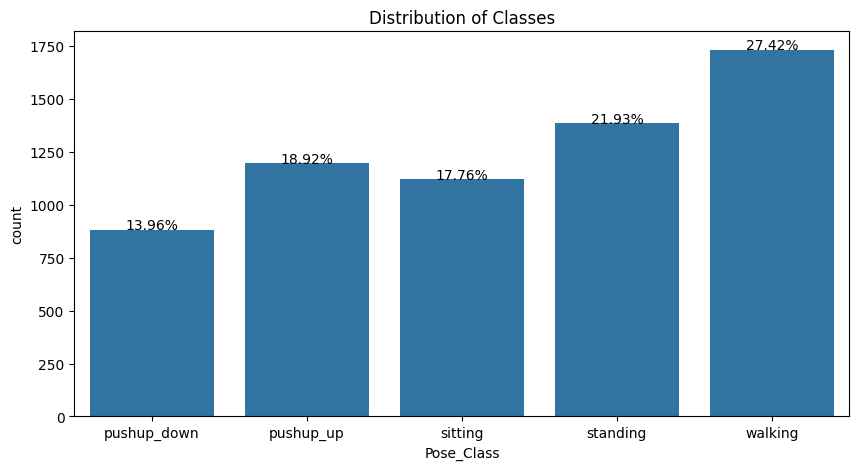

In [ ]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x = main_dataset['Pose_Class'])
plt.title('Distribution of Classes')

total = len(main_dataset['Pose_Class'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{100 * height / total:.2f}%', ha='center')


plt.show()

<ipython-input-11-cf486f570e13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=main_dataset['Pose_Class'], palette=custom_colors)
<ipython-input-11-cf486f570e13>:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  ax = sns.countplot(x=main_dataset['Pose_Class'], palette=custom_colors)


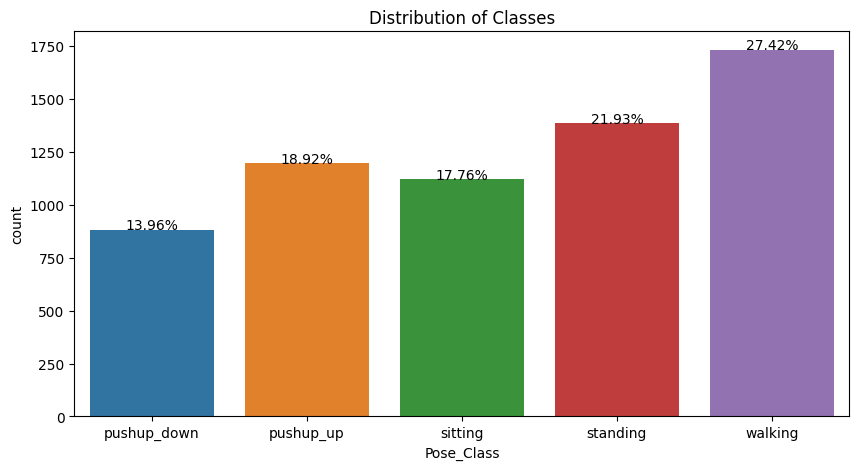

In [ ]:
plt.figure(figsize=(10, 5))

# Define a custom palette with more colors
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax = sns.countplot(x=main_dataset['Pose_Class'], palette=custom_colors)

plt.title('Distribution of Classes')

total = len(main_dataset['Pose_Class'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{100 * height / total:.2f}%', ha='center')

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_correlation(data):
    rcParams['figure.figsize'] = 50, 50
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')



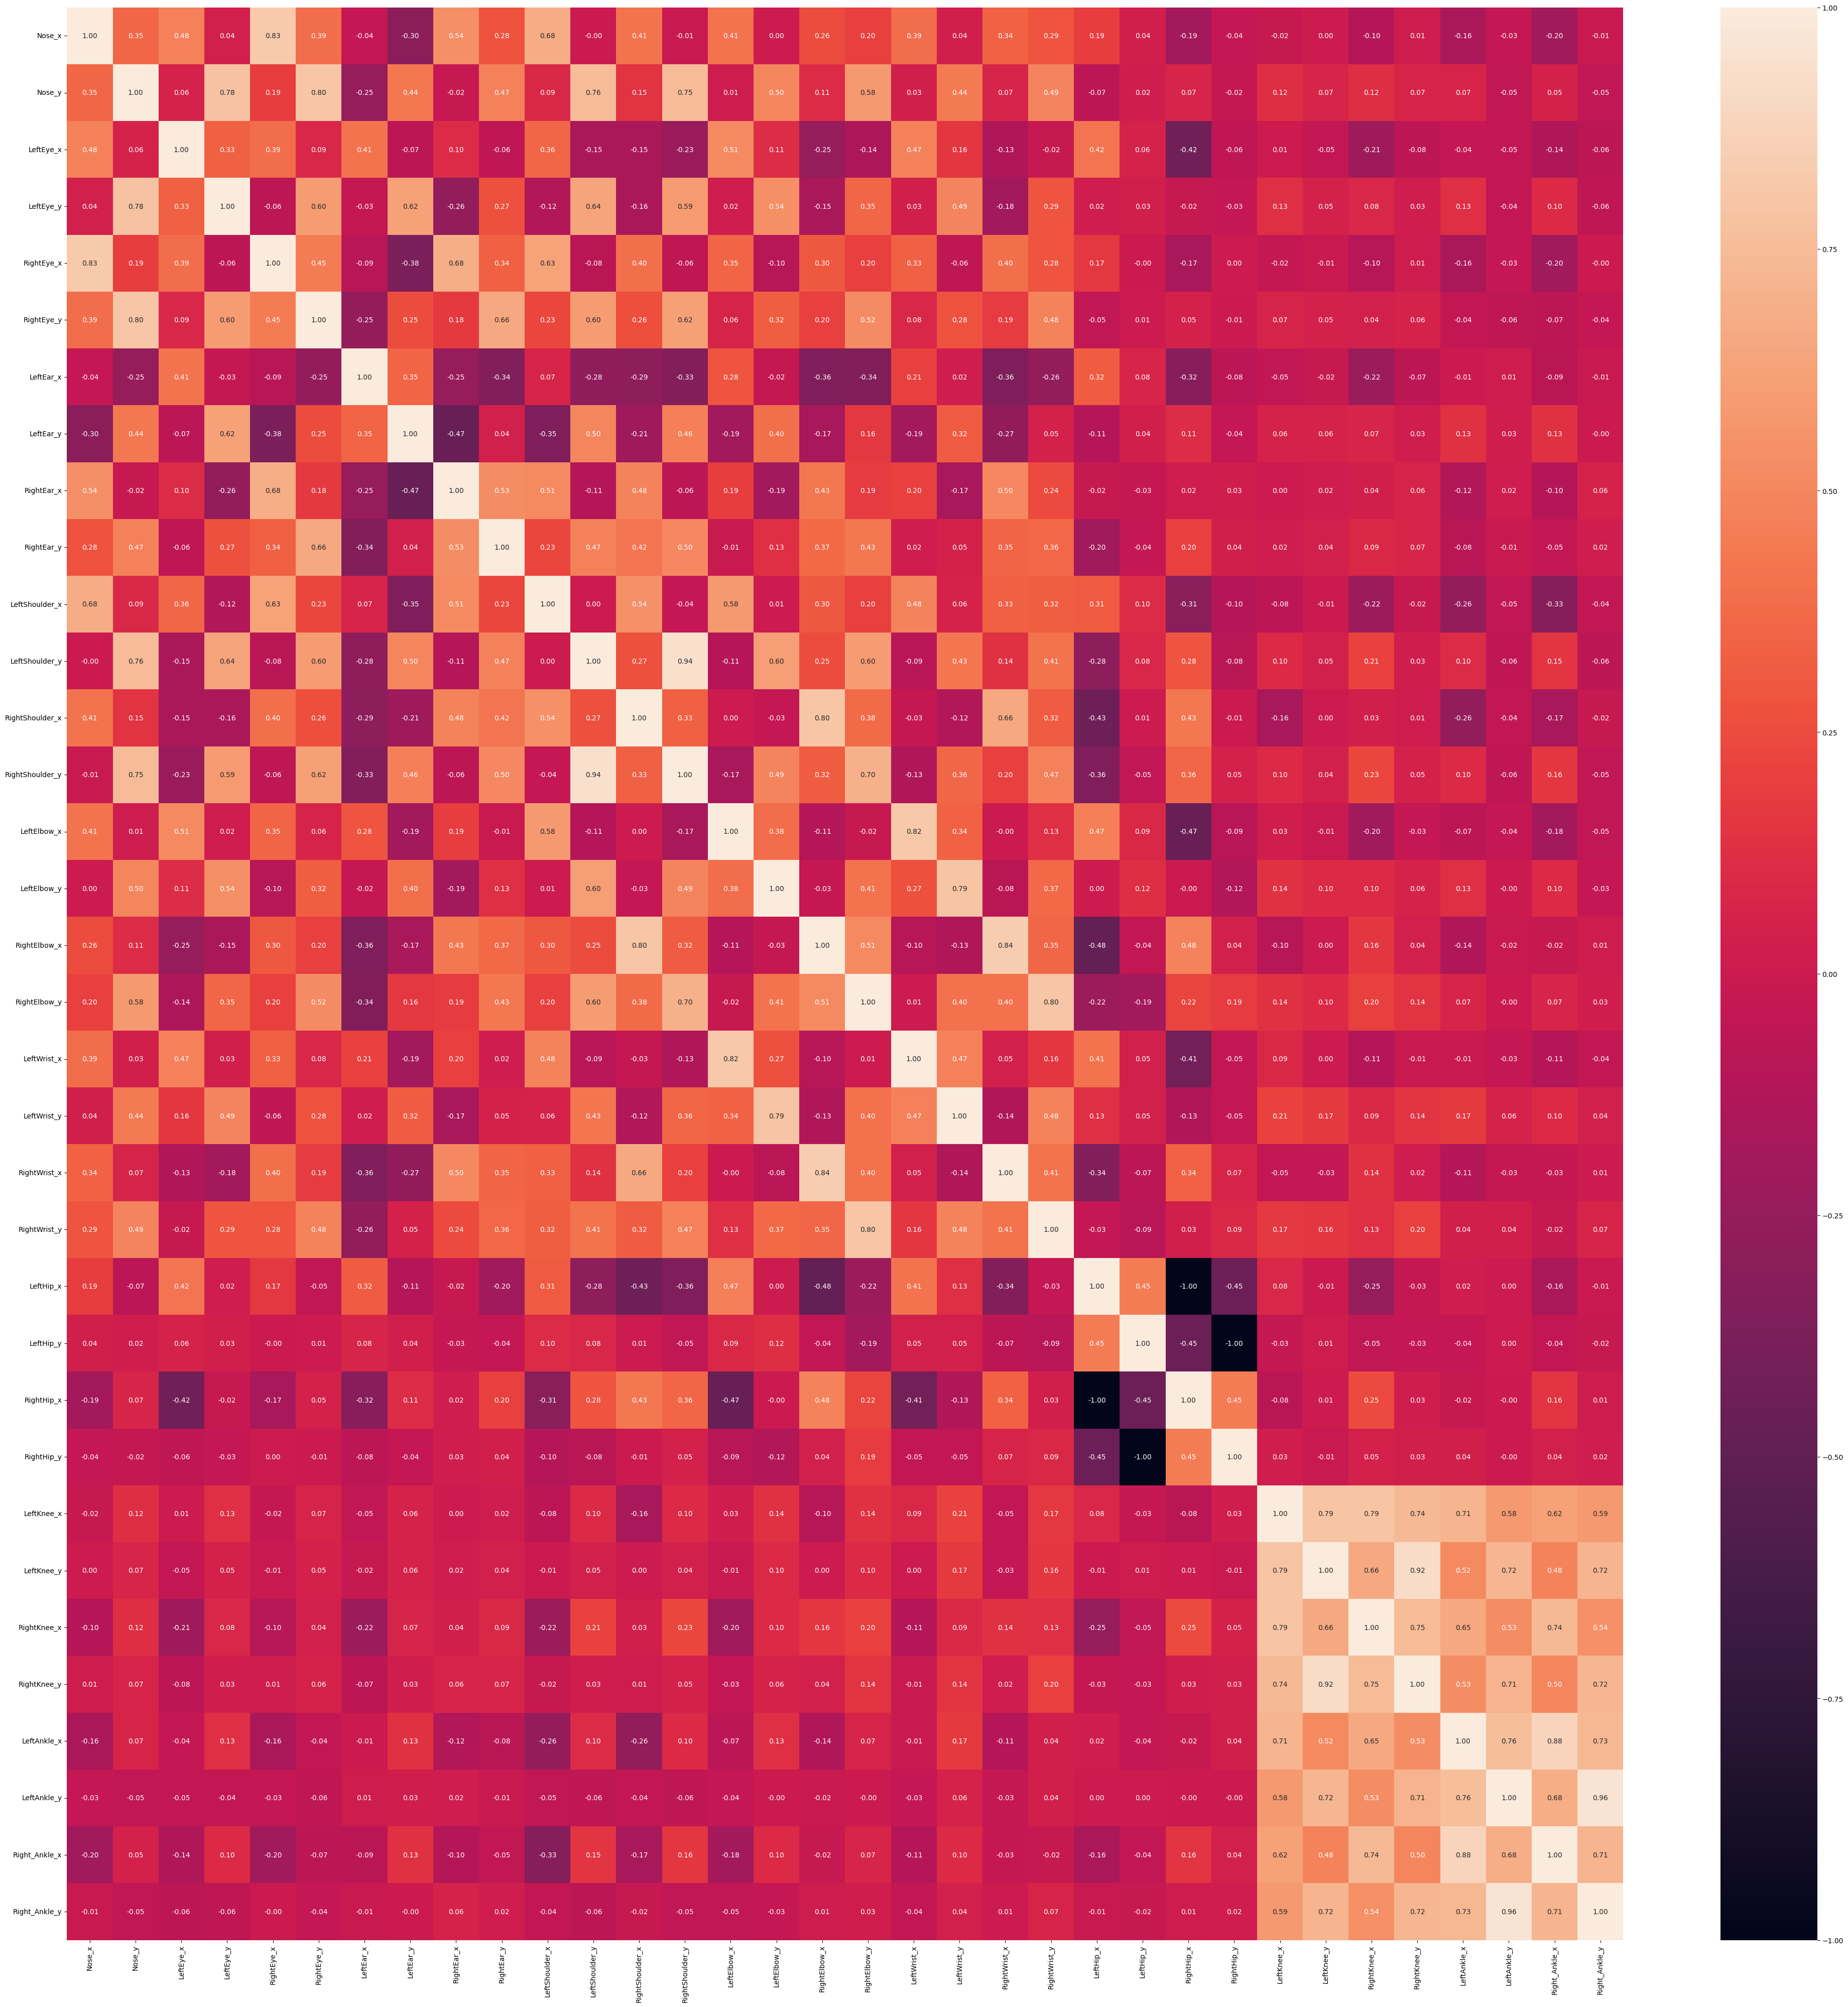

In [ ]:
cor_dataset=(main_dataset.drop(['Pose_Class'],axis=1))
cor_dataset.columns = ['Nose_x','Nose_y',
'LeftEye_x', 'LeftEye_y',
'RightEye_x','RightEye_y',
'LeftEar_x','LeftEar_y',
'RightEar_x','RightEar_y',
'LeftShoulder_x','LeftShoulder_y',
'RightShoulder_x','RightShoulder_y',
'LeftElbow_x','LeftElbow_y',
'RightElbow_x','RightElbow_y',
'LeftWrist_x','LeftWrist_y',
'RightWrist_x','RightWrist_y',
'LeftHip_x','LeftHip_y',
'RightHip_x','RightHip_y',
'LeftKnee_x','LeftKnee_y',
'RightKnee_x','RightKnee_y',
'LeftAnkle_x','LeftAnkle_y',
'Right_Ankle_x','Right_Ankle_y']
plot_correlation(cor_dataset)

In [ ]:
correlation_matrix = cor_dataset.corr()

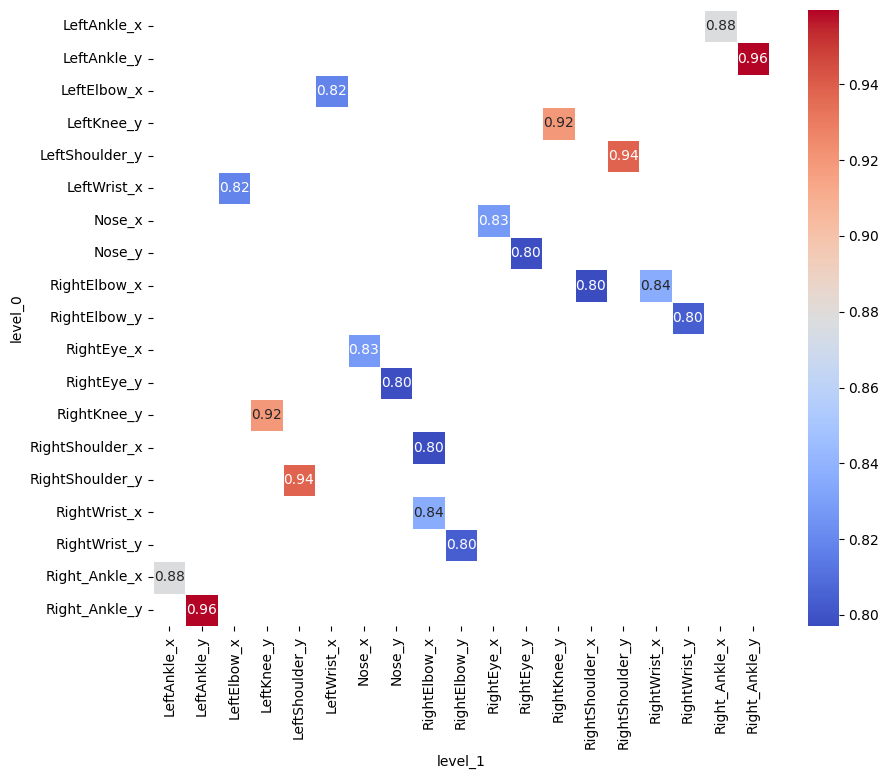

In [ ]:
# Unstack the correlation matrix and sort by absolute value
corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# Remove self-correlations (1.0)
corr_pairs = corr_pairs[corr_pairs < 1]

# Select top N correlations
top_n = 20 # Number of top correlations to display
top_corr_pairs = corr_pairs.head(top_n)

# Convert back to a matrix for heatmap plotting
top_corr_matrix = top_corr_pairs.reset_index().pivot(index='level_0', columns='level_1', values=0)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Show the plot
plt.show()

#Data Partitioning

In [ ]:
print(main_dataset.shape)

(6316, 35)


In [ ]:
print(main_dataset.shape)

(6316, 35)


In [ ]:
main_dataset["Pose_Class"]

,Pose_Class
0,pushup_down
1,pushup_down
2,pushup_down
3,pushup_down
4,pushup_down
5,pushup_down
6,pushup_down
7,pushup_down
8,pushup_down
10,pushup_down


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
main_dataset['Pose_Class'] = le.fit_transform(main_dataset['Pose_Class'])

<ipython-input-116-9b0208284c38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_dataset['Pose_Class'] = le.fit_transform(main_dataset['Pose_Class'])


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

features = np.array(main_dataset.drop(['Pose_Class'], axis=1))
target = np.array(main_dataset['Pose_Class'])



In [ ]:
print(features.shape)
print(target.shape)

(6316, 34)
(6316,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=43)
all_accuracy={}

#Decision Tree

In [ ]:
missclassified=[]
aaccuracy=[]
level=[]
for i in range (2,30):
  dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0)
  dtree.fit(X_train, y_train)
  y_pred = dtree.predict(X_test)
  count_misclassified = (y_test != y_pred).sum()
  accuracy = metrics.accuracy_score(y_test, y_pred)
  missclassified.append(count_misclassified)
  aaccuracy.append(accuracy)
  level.append(i)


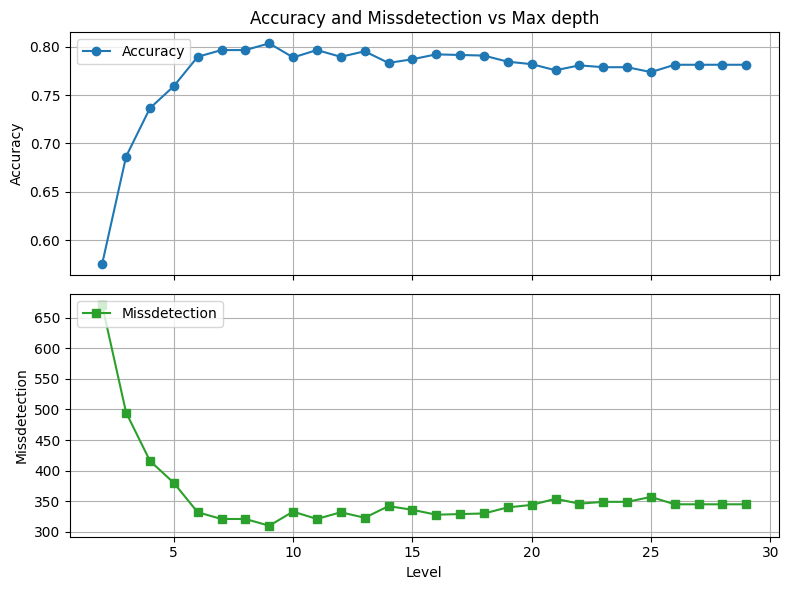

In [ ]:
import matplotlib.pyplot as plt

# Data
level = level
accuracy = aaccuracy
missdetection = missclassified

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot accuracy on the first subplot
ax1.plot(level, accuracy, 'o-', color='tab:blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Missdetection vs Max depth')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot missdetection on the second subplot
ax2.plot(level, missdetection, 's-', color='tab:green', label='Missdetection')
ax2.set_xlabel('Level')
ax2.set_ylabel('Missdetection')
ax2.legend(loc='upper left')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
all_accuracy['Decision Tree']=accuracy

Misclassified samples: 310
Accuracy: 0.80


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[173  18  11   0   4]
 [ 12 291   4   2   1]
 [  4   9 217  36  14]
 [ 10   8  27 197  93]
 [  2   2   8  45 391]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       206
           1       0.89      0.94      0.91       310
           2       0.81      0.78      0.79       280
           3       0.70      0.59      0.64       335
           4       0.78      0.87      0.82       448

    accuracy                           0.80      1579
   macro avg       0.81      0.80      0.80      1579
weighted avg       0.80      0.80      0.80      1579



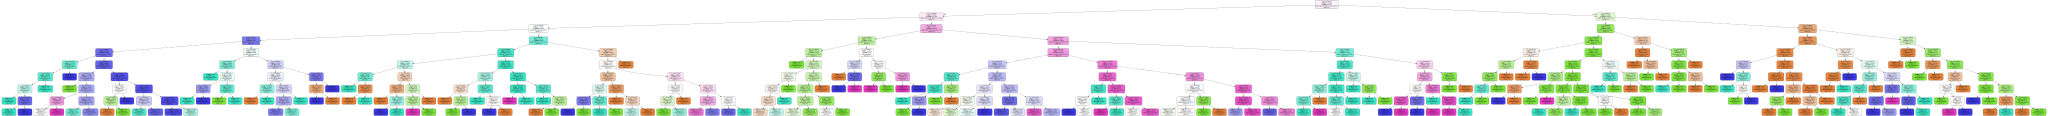

In [ ]:
import graphviz
X=main_dataset.drop(['Pose_Class'], axis=1)
feature_names = X.columns
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
 feature_names=feature_names,
 class_names=["0", "1","2", "3","4"])
graph = graphviz.Source(dot_data)
graph
#output_filename = 'decision_tree'
#graph.render(filename=output_filename, format='png', cleanup=True)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
missclassified=[]
aaccuracy=[]
level=[]
for i in range (2,30):
  rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = i, max_features = 34, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
  rand_clf.fit(X_train, y_train)
  y_pred = rand_clf.predict(X_test)
  count_misclassified = (y_test != y_pred).sum()
  accuracy = metrics.accuracy_score(y_test, y_pred)
  missclassified.append(count_misclassified)
  aaccuracy.append(accuracy)
  level.append(i)

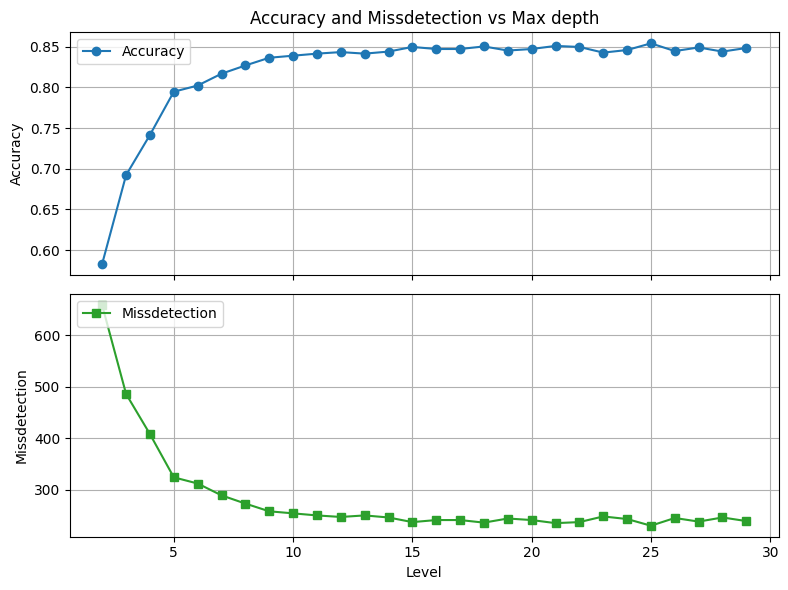

In [ ]:
import matplotlib.pyplot as plt

# Data
level = level
accuracy = aaccuracy
missdetection = missclassified

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot accuracy on the first subplot
ax1.plot(level, accuracy, 'o-', color='tab:blue', label='Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Missdetection vs Max depth')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot missdetection on the second subplot
ax2.plot(level, missdetection, 's-', color='tab:green', label='Missdetection')
ax2.set_xlabel('Level')
ax2.set_ylabel('Missdetection')
ax2.legend(loc='upper left')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 25, max_features = 34, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features=34,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
feature_importances = rand_clf.feature_importances_

# Convert to a Pandas DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(np.arange(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

NameError: name 'X' is not defined

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8452617414976897


In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_features = 34, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=34, n_estimators=200)

In [ ]:
y_pred = rand_clf.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
all_accuracy['Random Forest']=accuracy

Misclassified samples: 238
Accuracy: 0.85


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  11   7   2   2]
 [  7 295   2   6   0]
 [  0   4 231  28  17]
 [  3   0  14 246  72]
 [  2   3   5  53 385]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       206
           1       0.94      0.95      0.95       310
           2       0.89      0.82      0.86       280
           3       0.73      0.73      0.73       335
           4       0.81      0.86      0.83       448

    accuracy                           0.85      1579
   macro avg       0.86      0.85      0.86      1579
weighted avg       0.85      0.85      0.85      1579



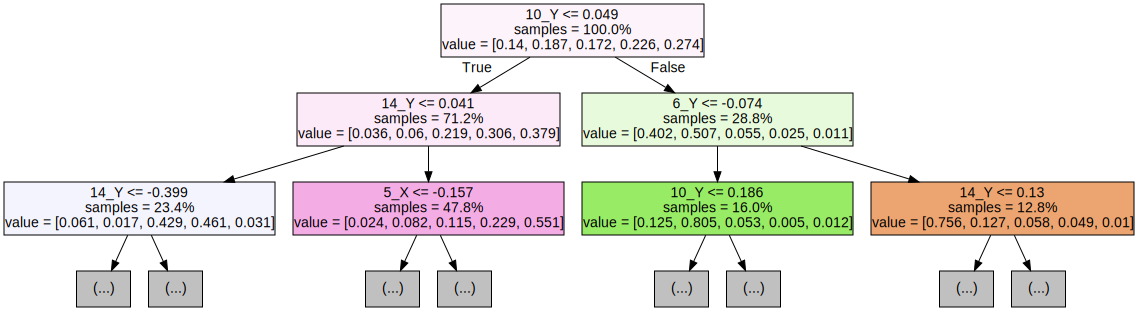

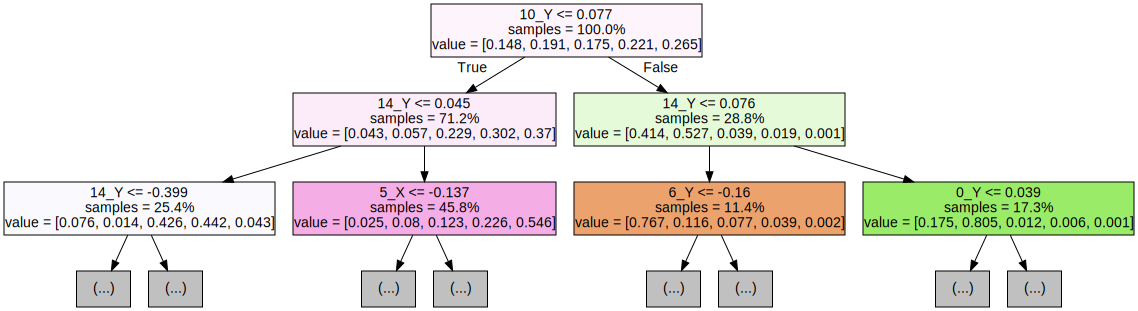

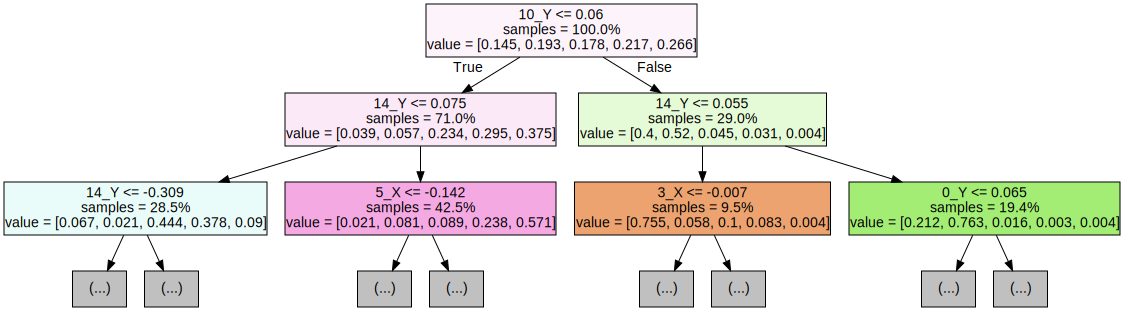

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rand_clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)
    graph.render(f'tree_{i}', format='png', cleanup=True)


#KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2, y_train)
    pred_i = knn.predict(X_test2)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

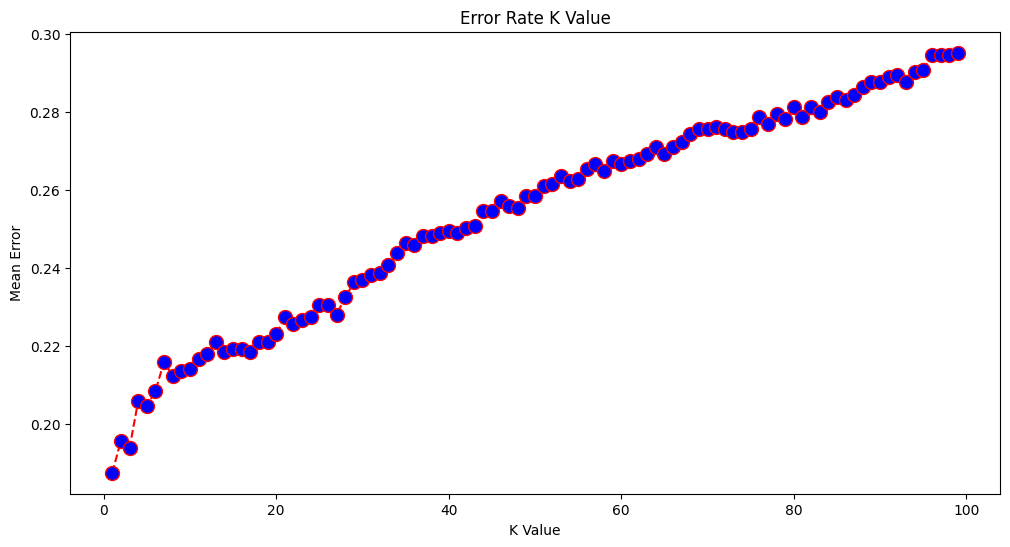

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define a range of values for n_neighbors to try
param_grid = {'n_neighbors': range(1, 50)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the model
grid_search.fit(X_train2, y_train)

# Get the best n_neighbors value
best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"The best n_neighbors value is: {best_n_neighbors}")


The best n_neighbors value is: 6


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 500)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform the grid search
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train2, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        9...
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499])},
             return_train_score=True, scoring='accuracy')

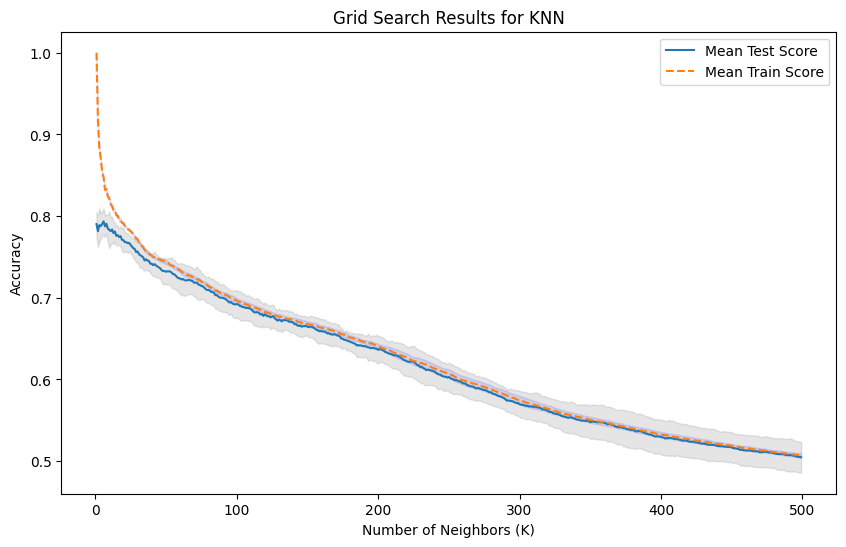

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert the GridSearchCV results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Ensure that the columns are numeric
results['param_n_neighbors'] = pd.to_numeric(results['param_n_neighbors'], errors='coerce')
results['mean_test_score'] = pd.to_numeric(results['mean_test_score'], errors='coerce')
results['std_test_score'] = pd.to_numeric(results['std_test_score'], errors='coerce')
results['mean_train_score'] = pd.to_numeric(results['mean_train_score'], errors='coerce')
results['std_train_score'] = pd.to_numeric(results['std_train_score'], errors='coerce')

# Handle NaN values if any
results.dropna(subset=['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score'], inplace=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], label='Mean Test Score')
plt.plot(results['param_n_neighbors'], results['mean_train_score'], label='Mean Train Score', linestyle='--')

# Fill between the mean test score +/- standard deviation
plt.fill_between(results['param_n_neighbors'],
                 results['mean_test_score'] - results['std_test_score'],
                 results['mean_test_score'] + results['std_test_score'],
                 color='gray', alpha=0.2)

# Fill between the mean train score +/- standard deviation
plt.fill_between(results['param_n_neighbors'],
                 results['mean_train_score'] - results['std_train_score'],
                 results['mean_train_score'] + results['std_train_score'],
                 color='blue', alpha=0.1)

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Grid Search Results for KNN')
plt.legend()
plt.show()


In [ ]:

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train2, y_train)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = classifier.predict(X_test2)

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
all_accuracy['KNN']=accuracy

Misclassified samples: 329
Accuracy: 0.79


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[167  20   7   9   3]
 [ 19 280   2   5   4]
 [  2   4 193  55  26]
 [  2   3  24 228  78]
 [  1   4   7  54 382]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       206
           1       0.90      0.90      0.90       310
           2       0.83      0.69      0.75       280
           3       0.65      0.68      0.66       335
           4       0.77      0.85      0.81       448

    accuracy                           0.79      1579
   macro avg       0.81      0.79      0.79      1579
weighted avg       0.80      0.79      0.79      1579



#Suprot Vector Machine

In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train2, y_train)
y_pred=clf.predict(X_test2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.1, 0.01, 0.001],
    'degree': [2, 3, 4]  # only relevant if using 'poly' kernel
}

# Initialize the SVM classifier
svc = svm.SVC()

# Perform grid search
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train2, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test2)


Best parameters found:  {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
all_accuracy['SVM']=accuracy

Misclassified samples: 240
Accuracy: 0.85


In [ ]:
results = grid_search.cv_results_


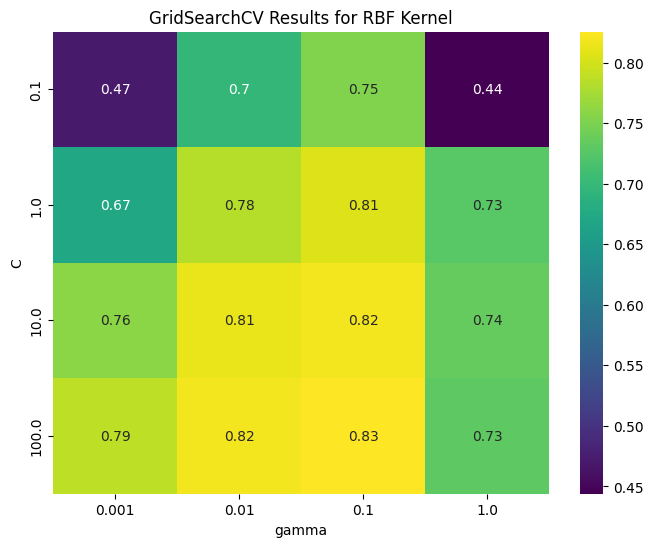

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract mean test scores from cv_results_
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Create a DataFrame from cv_results_
results_df = pd.DataFrame(grid_search.cv_results_)

# Filter the results for the 'rbf' kernel only
rbf_results = results_df[results_df['param_kernel'] == 'rbf']

# Group by 'param_C' and 'param_gamma' to handle duplicates and calculate the mean
# We only aggregate the 'mean_test_score' column
rbf_pivot_data = rbf_results.groupby(['param_C', 'param_gamma'], as_index=False)['mean_test_score'].mean()

# Create pivot table for heatmap
heatmap_data = rbf_pivot_data.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title("GridSearchCV Results for RBF Kernel")
plt.xlabel("gamma")
plt.ylabel("C")
plt.show()


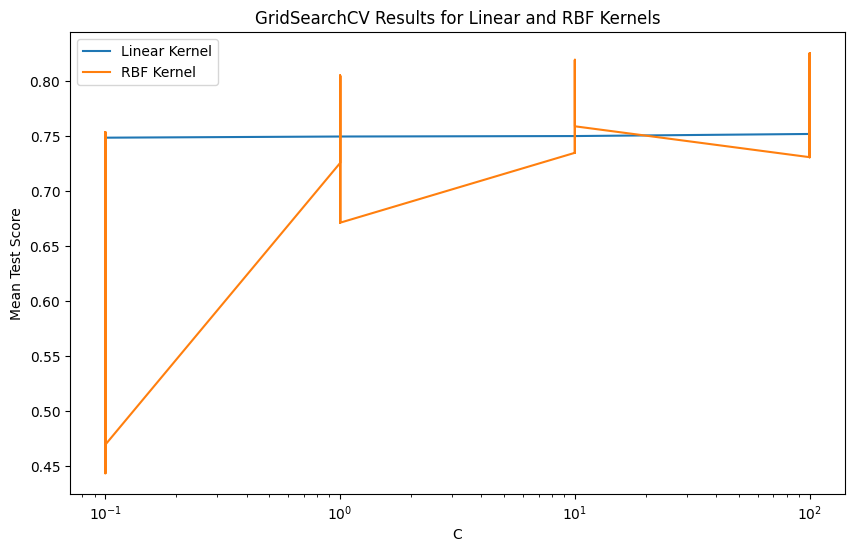

In [ ]:
# Filter the results for the 'linear' and 'rbf' kernels
linear_results = results_df[results_df['param_kernel'] == 'linear']
rbf_results = results_df[results_df['param_kernel'] == 'rbf']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(linear_results['param_C'], linear_results['mean_test_score'], label='Linear Kernel')
plt.plot(rbf_results['param_C'], rbf_results['mean_test_score'], label='RBF Kernel')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results for Linear and RBF Kernels')
plt.legend()
plt.show()


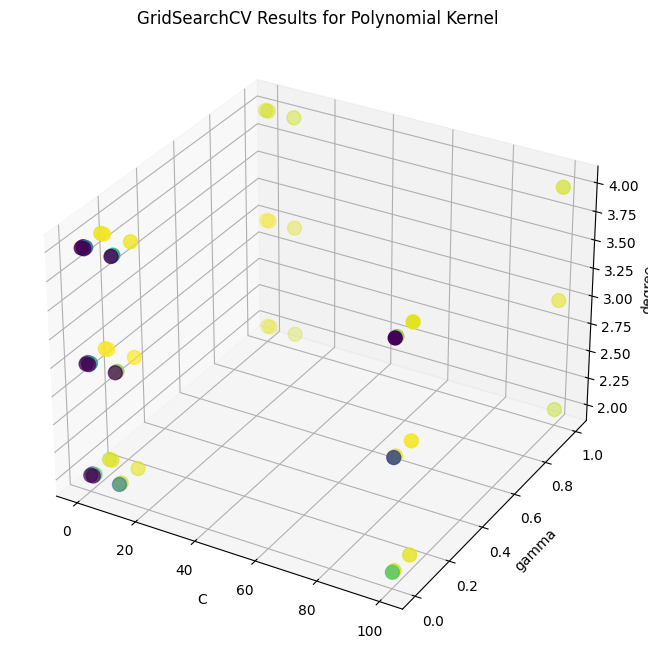

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Filter results for a specific kernel (e.g., 'poly')
poly_results = results_df[results_df['param_kernel'] == 'poly']

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting C, gamma, and degree
ax.scatter(poly_results['param_C'], poly_results['param_gamma'], poly_results['param_degree'],
           c=poly_results['mean_test_score'], cmap='viridis', s=100)

ax.set_xlabel('C')
ax.set_ylabel('gamma')
ax.set_zlabel('degree')
plt.title("GridSearchCV Results for Polynomial Kernel")
plt.show()


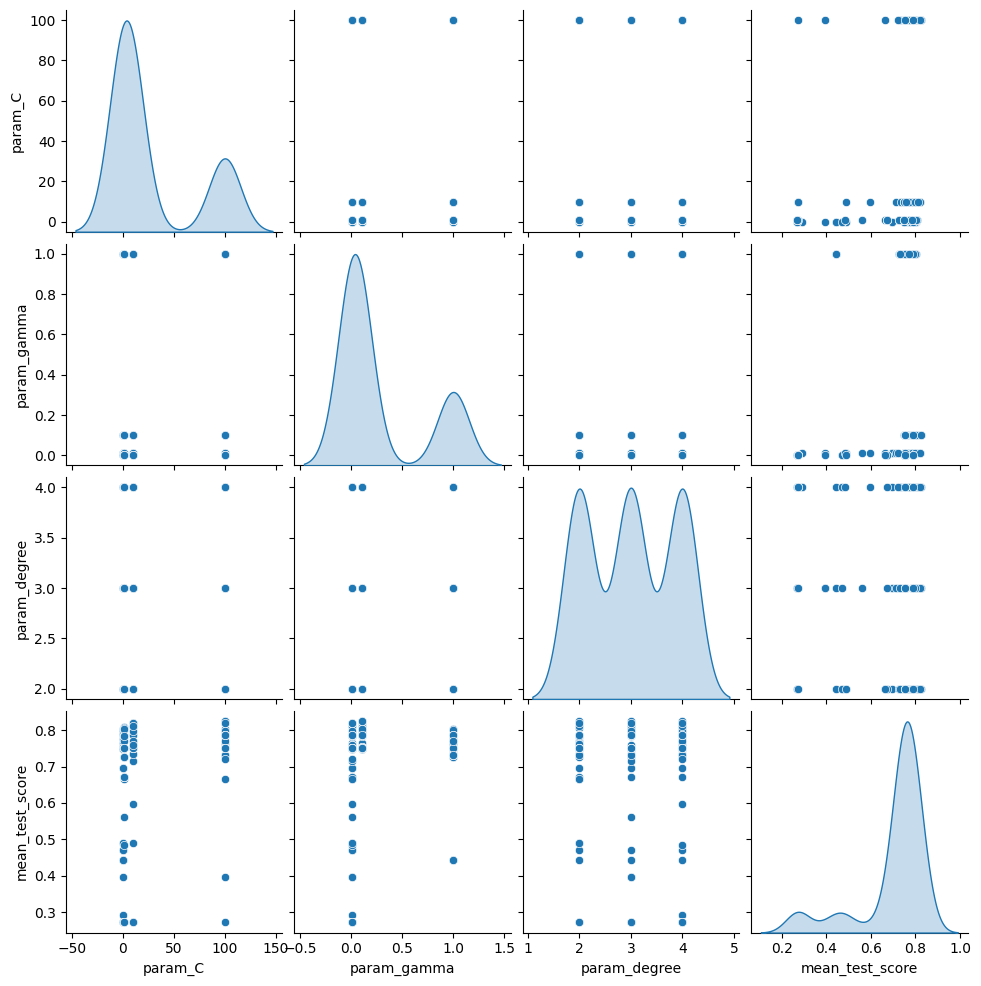

In [ ]:
# Selecting relevant columns from the results
pairplot_data = results_df[['param_C', 'param_gamma', 'param_degree', 'mean_test_score']]

# Replace 'None' with NaN in the DataFrame if there are irrelevant hyperparameters
pairplot_data = pairplot_data.replace('None', np.nan).dropna()

# Plotting pairplot
sns.pairplot(pairplot_data, diag_kind='kde')
plt.show()


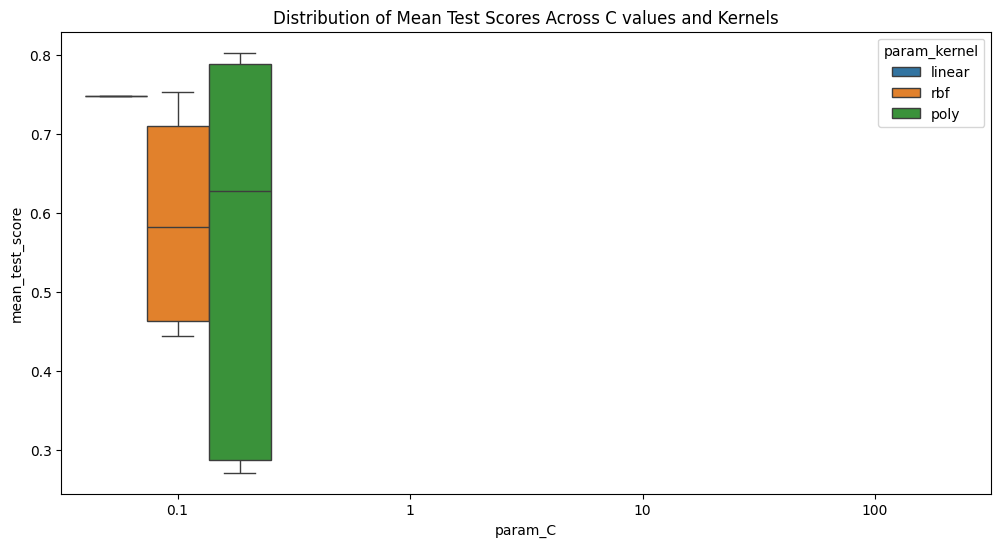

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_C', y='mean_test_score', hue='param_kernel', data=results_df)
plt.title('Distribution of Mean Test Scores Across C values and Kernels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  11   7   2   2]
 [  7 295   2   6   0]
 [  0   4 231  28  17]
 [  3   0  14 246  72]
 [  2   3   5  53 385]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       206
           1       0.94      0.95      0.95       310
           2       0.89      0.82      0.86       280
           3       0.73      0.73      0.73       335
           4       0.81      0.86      0.83       448

    accuracy                           0.85      1579
   macro avg       0.86      0.85      0.86      1579
weighted avg       0.85      0.85      0.85      1579



#Deep Learning

In [ ]:
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               17920     
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 32)               

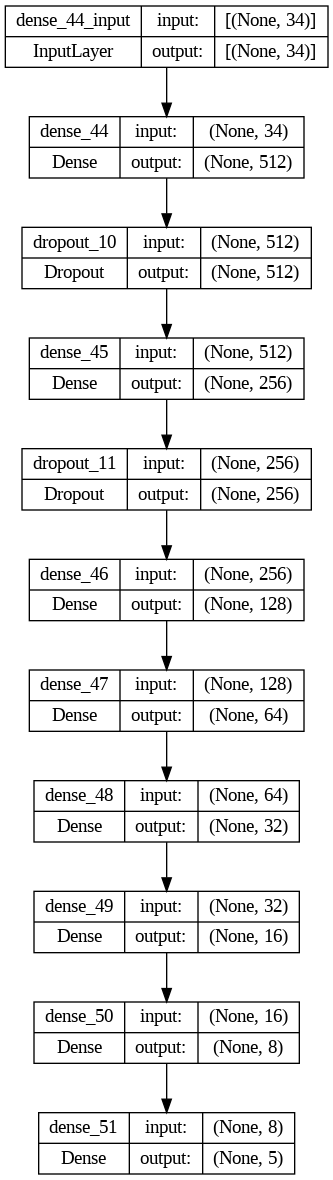

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import plot_model



model = Sequential()
model.add(Dense(512, input_shape=(34,), activation='relu'))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
149/149 [==============================] - 3s 11ms/step - loss: 1.3219 - accuracy: 0.4940 - val_loss: 1.0419 - val_accuracy: 0.6865
Epoch 2/100
149/149 [==============================] - 2s 10ms/step - loss: 0.9159 - accuracy: 0.7175 - val_loss: 0.7678 - val_accuracy: 0.7511
Epoch 3/100
149/149 [==============================] - 1s 9ms/step - loss: 0.7425 - accuracy: 0.7598 - val_loss: 0.6653 - val_accuracy: 0.7796
Epoch 4/100
149/149 [==============================] - 1s 9ms/step - loss: 0.6043 - accuracy: 0.7851 - val_loss: 0.5946 - val_accuracy: 0.7878
Epoch 5/100
149/149 [==============================] - 1s 9ms/step - loss: 0.5623 - accuracy: 0.7927 - val_loss: 0.6837 - val_accuracy: 0.7726
Epoch 6/100
149/149 [==============================] - 2s 11ms/step - loss: 0.5198 - accuracy: 0.8079 - val_loss: 0.5698 - val_accuracy: 0.8049
Epoch 7/100
149/149 [==============================] - 2s 15ms/step - loss: 0.5159 - accuracy: 0.8085 - val_loss: 0.6336 - val_accuracy: 0.

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=["0", "1","2", "3","4"]))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       206
           1       0.93      0.97      0.95       310
           2       0.91      0.78      0.84       280
           3       0.72      0.65      0.69       335
           4       0.78      0.91      0.84       448

    accuracy                           0.84      1579
   macro avg       0.86      0.84      0.85      1579
weighted avg       0.84      0.84      0.84      1579

Confusion Matrix:
[[182  13   4   3   4]
 [  5 301   0   2   2]
 [  1   2 217  46  14]
 [  1   6  12 219  97]
 [  1   2   5  33 407]]


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')
all_accuracy['DNN']= accuracy

# Save the model if needed
model.save('classification_model_first_train.h5')

50/50 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.8398
Test accuracy: 0.8397719860076904


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


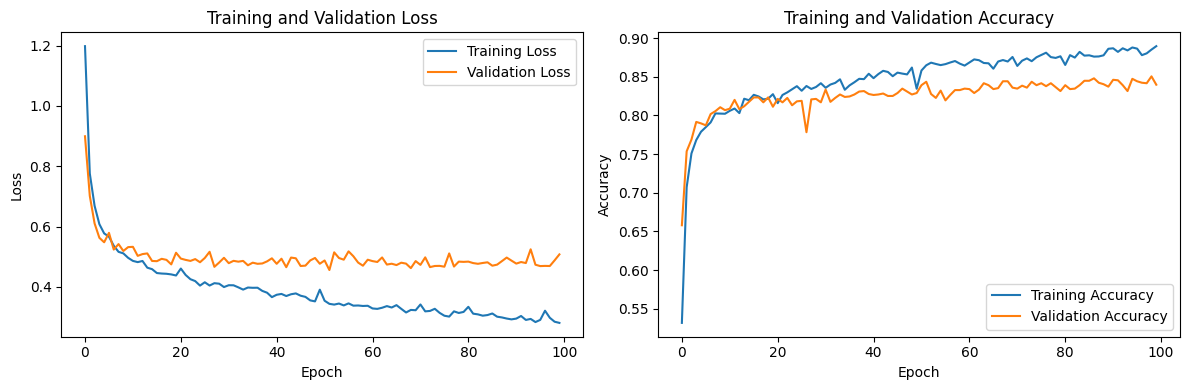

In [ ]:
import matplotlib.pyplot as plt



training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


#Result Analysis

In [ ]:
all_accuracy['DNN']= 0.8505

In [ ]:
print(all_accuracy)

{'KNN': 0.7916402786573781, 'SVM': 0.8480050664977834, 'DNN': 0.8505, 'Decision Tree': 0.8036732108929703, 'Random Forest': 0.8492716909436352}


In [ ]:
print(all_accuracy)

{'Decision Tree': 0.7815072830905636, 'Random Forest': 0.8391386953768207, 'KNN': 0.7954401519949335, 'SVM': 0.7637745408486384, 'DNN': 0.8397719860076904}


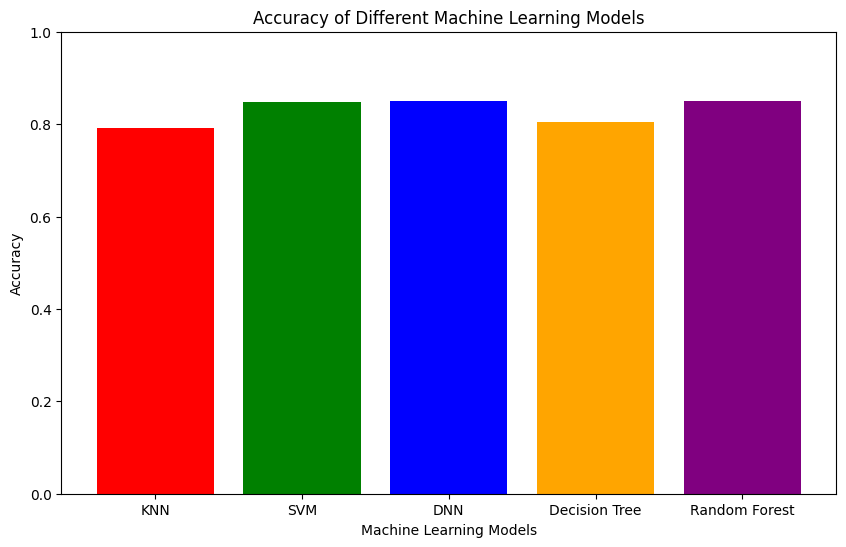

In [ ]:
import matplotlib.pyplot as plt

data = all_accuracy
plt.figure(figsize=(10, 6))
models = list(data.keys())
accuracy = list(data.values())
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(models, accuracy, color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.ylim(0, 1)
plt.show()


In [ ]:
from keras import layers, Sequential
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import keras
import pandas as pd
import os
import json
import argparse

In [ ]:
# Keras Model Arc
model2 = Sequential([
    layers.Dense(512, activation='relu', input_shape=[34]),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation="softmax")
])

# Model Summary
print('Model Summary: ', model2.summary())

# model compile
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 512)               17920     
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 5)                 1285      
                                                                 
Total params: 150533 (588.02 KB)
Trainable params: 150533 (588.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Summary:  None


In [ ]:
history=model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
149/149 [==============================] - 3s 10ms/step - loss: 0.9194 - accuracy: 0.6730 - val_loss: 0.7075 - val_accuracy: 0.7403
Epoch 2/100
149/149 [==============================] - 1s 8ms/step - loss: 0.6288 - accuracy: 0.7705 - val_loss: 0.5705 - val_accuracy: 0.7980
Epoch 3/100
149/149 [==============================] - 1s 8ms/step - loss: 0.5292 - accuracy: 0.8001 - val_loss: 0.5435 - val_accuracy: 0.7859
Epoch 4/100
149/149 [==============================] - 2s 13ms/step - loss: 0.4912 - accuracy: 0.8149 - val_loss: 0.5286 - val_accuracy: 0.8005
Epoch 5/100
149/149 [==============================] - 2s 12ms/step - loss: 0.4689 - accuracy: 0.8187 - val_loss: 0.5533 - val_accuracy: 0.7897
Epoch 6/100
149/149 [==============================] - 2s 11ms/step - loss: 0.4523 - accuracy: 0.8256 - val_loss: 0.5067 - val_accuracy: 0.8024
Epoch 7/100
149/149 [==============================] - 1s 8ms/step - loss: 0.4333 - accuracy: 0.8322 - val_loss: 0.5038 - val_accuracy: 0.

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')
all_accuracy['DNN']= accuracy

50/50 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.8607
Test accuracy: 0.8606712818145752


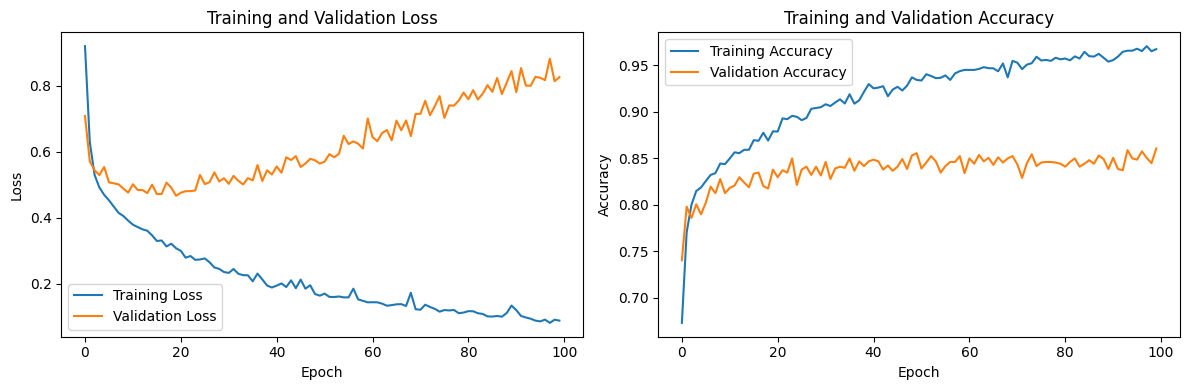

In [ ]:
import matplotlib.pyplot as plt



training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred = model2.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=["0", "1","2", "3","4"]))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

50/50 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       206
           1       0.95      0.97      0.96       310
           2       0.85      0.83      0.84       280
           3       0.75      0.77      0.76       335
           4       0.85      0.86      0.85       448

    accuracy                           0.86      1579
   macro avg       0.87      0.86      0.87      1579
weighted avg       0.86      0.86      0.86      1579

Confusion Matrix:
[[185  11   5   1   4]
 [  4 300   1   4   1]
 [  2   3 232  26  17]
 [  2   0  28 258  47]
 [  2   2   6  54 384]]


In [ ]:
model2.save('86%.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
